In [240]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from skimage.transform import PiecewiseAffineTransform, warp
from skimage.draw import line_aa, circle_perimeter_aa


In [185]:
def piecewise_affine_transform(img):
    rows, cols = img.shape[0], img.shape[1]

    src_cols = np.linspace(0, cols, random.randint(10, 20))
    src_rows = np.linspace(0, rows, random.randint(10, 20))
    src_rows, src_cols = np.meshgrid(src_rows, src_cols)
    src = np.dstack([src_cols.flat, src_rows.flat])[0]

    # add sinusoidal oscillation to row coordinates
    dst_rows = src[:, 1] - np.sin(np.linspace(0, random.randint(3, 5) * np.pi, src.shape[0])) * 10
    dst_cols = src[:, 0]

    dst = np.vstack([dst_cols, dst_rows]).T


    tform = PiecewiseAffineTransform()
    tform.estimate(src, dst)

    out_rows = img.shape[0]
    out_cols = cols
    out = warp(img, tform, output_shape=(out_rows, out_cols))
    out = out[16:-16, :]
    return out

In [266]:
def draw_disks(img, num_lines):
    rows, cols = img.shape[0], img.shape[1]
    radius = np.clip(random.gauss(1, 2), 1, 4)
    for i in range(num_lines):
        rr, cc = disk(
            (random.randint(5, rows-5),
            random.randint(10, cols-10)),
            radius
            )
        img[rr, cc] = random.randint(0, 150)

    return img

In [261]:
def draw_lines(img, num_lines):
    rows, cols = img.shape[0], img.shape[1]

    for i in range(num_lines):
        rr, cc, val = line_aa(
            random.randint(5, rows-5),
            random.randint(10, cols-10), 
            random.randint(5, rows-5), 
            random.randint(10, cols-10)
            )
        img[rr, cc, :] = val[:, np.newaxis]
    return img

In [227]:
draw_func = random.choice([line, line_aa])

In [228]:
draw_func

<function skimage.draw.draw.line(r0, c0, r1, c1)>

2


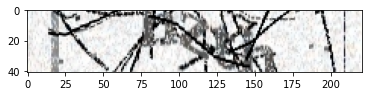

3


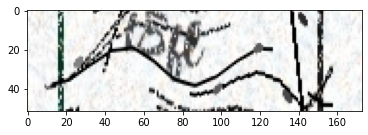

In [267]:

for i in range(2,4):
    image = cv2.imread(f"synthetic_data/imgs/{i+1}_captcha.jpg")
    out = draw_lines(image, 4)
    out = draw_disks(out, 10)
    out = piecewise_affine_transform(out)
    out *= 255
    out = out.astype(np.uint8)
    # print(np.max(out), np.min(out))
    
    # cv2.imwrite(f"synthetic_data/skew/{i+1}_captcha.jpg", out)

    fig, ax = plt.subplots()
    print(i)
    ax.imshow(out)
    # # ax.plot(tform.inverse(src)[:, 0], tform.inverse(src)[:, 1], '.b')
    # # ax.axis((0, out_cols, out_rows, 0))
    plt.show()

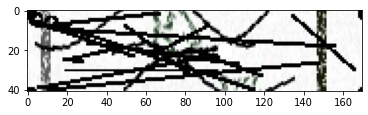

In [257]:
from skimage.draw import line_aa, rectangle, disk
rr, cc = disk((20,100), 4)
out[rr, cc] = 255
plt.imshow(out)

In [254]:
radius = np.clip(random.gauss(1, 2), 1, 4)

In [255]:
radius

3.5567422806056506

In [234]:
img = np.zeros((10, 10), dtype=np.uint8)
rr, cc, val = draw_func(10, 20, 38, 170)
out[rr, cc, :] = val[:, np.newaxis]


ValueError: not enough values to unpack (expected 3, got 2)

In [204]:
val[:, np.newaxis].shape

(307, 1)

In [121]:
src_rows

array([[ 0.        ,  1.85185185,  3.7037037 ,  5.55555556,  7.40740741,
         9.25925926, 11.11111111, 12.96296296, 14.81481481, 16.66666667,
        18.51851852, 20.37037037, 22.22222222, 24.07407407, 25.92592593,
        27.77777778, 29.62962963, 31.48148148, 33.33333333, 35.18518519,
        37.03703704, 38.88888889, 40.74074074, 42.59259259, 44.44444444,
        46.2962963 , 48.14814815, 50.        ],
       [ 0.        ,  1.85185185,  3.7037037 ,  5.55555556,  7.40740741,
         9.25925926, 11.11111111, 12.96296296, 14.81481481, 16.66666667,
        18.51851852, 20.37037037, 22.22222222, 24.07407407, 25.92592593,
        27.77777778, 29.62962963, 31.48148148, 33.33333333, 35.18518519,
        37.03703704, 38.88888889, 40.74074074, 42.59259259, 44.44444444,
        46.2962963 , 48.14814815, 50.        ],
       [ 0.        ,  1.85185185,  3.7037037 ,  5.55555556,  7.40740741,
         9.25925926, 11.11111111, 12.96296296, 14.81481481, 16.66666667,
        18.51851852, 20.3703